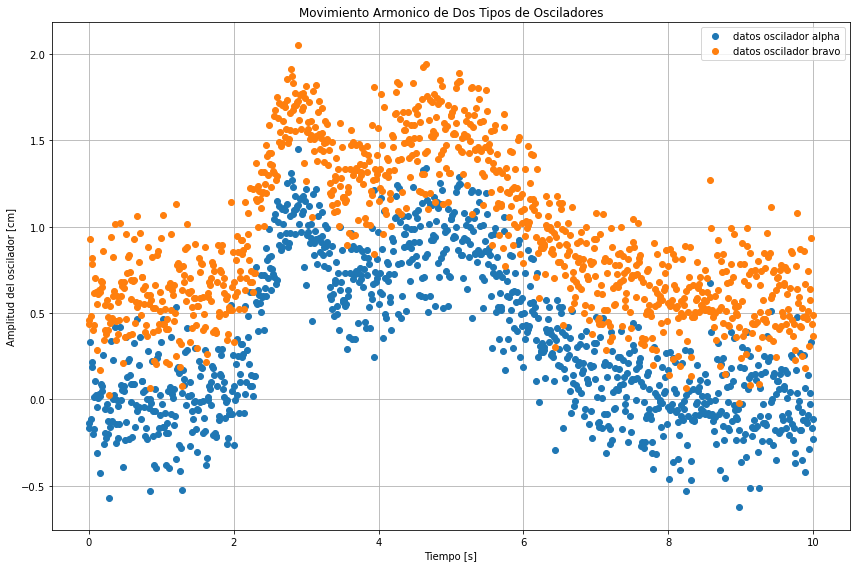

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit,least_squares
import pandas as pd

x_datos  = np.linspace(0, 10, 1000)
y_exacto = np.exp(-(x_datos-2.8)**2/0.5**2)+np.exp(-(x_datos-4.8)**2/1.5**2)
y_exacto_2 = np.exp(-(x_datos-2.8)**2/0.5**2)+np.exp(-(x_datos-4.8)**2/1.5**2)+0.6

# Para comparar después, Parámetros en orden de aparición:
parametros_reales = [2.8, 0.5, 4.8, 1.5]

# agregamos ruido
np.random.seed(1729)
y_ruido = 0.2 * np.random.normal(size=x_datos.size)
y_datos = y_exacto + y_ruido
y_datos_2 = y_exacto_2 + y_ruido


#fig, ax = plt.subplots(figsize=(12,8))
# Graficamos
plt.figure(figsize = (12,8))
plt.plot(x_datos,  y_datos, 'o', label='datos oscilador alpha', alpha = 1)
plt.plot(x_datos,  y_datos_2, 'o', label='datos oscilador bravo', alpha = 1)
#plt.plot(x_datos, y_exacto, '-', label='curva exacta')
plt.legend(loc='best')
plt.title("Movimiento Armonico de Dos Tipos de Osciladores")
plt.xlabel('Tiempo [s]')
plt.ylabel("Amplitud del oscilador [cm]")
plt.grid()
plt.tight_layout()



In [ ]:
data1 = pd.DataFrame({"tiempo": x_datos, "amplitud": y_datos, "tipo de onda": 1})
data2 = pd.DataFrame({"tiempo": x_datos, "amplitud": y_datos_2, "tipo de onda": 2})

In [ ]:
data = pd.concat([data1, data2], ignore_index = True, axis = 0)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
x = data.iloc[:, 0:2].values
y = data.iloc[:, 2].values

In [ ]:
print(x)
print(len(x))

In [ ]:
print(y)
print(len(y))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [ ]:
modelo = SVC(kernel = "poly", degree = 5, coef0 = 1, C = 500)
modelo.fit(X_train, y_train)

SVC(C=500, coef0=1, degree=5, kernel='poly')

In [ ]:
modelo = SVC(kernel = 'rbf', C = 100000, gamma = 0.1)
modelo.fit(X_train, y_train)

SVC(C=100000, gamma=0.1)

In [ ]:
print('Precisión del modelo:')
print(modelo.score(X_train, y_train))

Precisión del modelo:
0.9275


In [ ]:
predicciones = modelo.predict(X_train)
#print(predicciones)


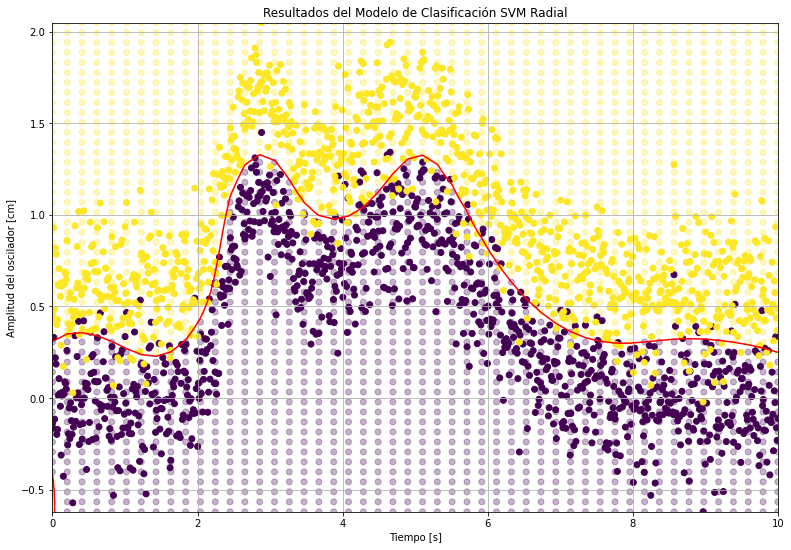

In [ ]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(data["tiempo"]), np.max(data["tiempo"]), 50)
y = np.linspace(np.min(data["amplitud"]), np.max(data["amplitud"]), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(13,9))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.3)
ax.scatter(data["tiempo"], data["amplitud"], c=data["tipo de onda"], alpha = 1)
ax.grid()



#data2 = pd.DataFrame({"tiempo": x_datos, "amplitud": y_datos_2, "tipo de onda": 2})

# Vectores soporte
#ax.scatter(
#    modelo.support_vectors_[:, 0],
#    modelo.support_vectors_[:, 1],
#    s=200, linewidth=1,
#    facecolors='none', edgecolors='black'
#)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors='r',
    levels=[0],
    alpha=1,
    linestyles='-'
)

ax.set_title("Resultados del Modelo de Clasificación SVM Radial")
ax.set_ylabel("Amplitud del oscilador [cm]")
ax.set_xlabel("Tiempo [s]");


In [ ]:
print(grid)
print(len(grid))

[[ 0.         -0.62082702]
 [ 0.         -0.56632999]
 [ 0.         -0.51183297]
 ...
 [10.          1.94053308]
 [10.          1.9950301 ]
 [10.          2.04952712]]
2500
